In [1]:
from __future__ import print_function
import torch
torch.__version__

'1.0.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd  import Variable

In [3]:
# 训练数据
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad=False).view(17, 1)
    Y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad=False)

    return X,Y


In [4]:
get_data()

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 5.6540],
         [ 9.2700],
         [ 3.1000]]),
 tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
         1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000]))

In [5]:
def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x, y]:
        print(type(a))
        if type(a) == torch.Tensor:
            l.append(a.data.numpy())
    plt.plot(l[0], l[1], z, **kwargs)

In [6]:
def get_weights():
    w  = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)
    return w, b

In [7]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

In [8]:
def loss_fn(y,y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None:
            param.grad.data.zero_()
    loss.backward()
    return loss.data

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data
    
learning_rate = 1e-4

In [9]:
x,y = get_data()
w,b = get_weights()
for i in range(1000):
    y_pred = simple_network(x)
   
    loss= loss_fn(y,y_pred)
    if i % 50 == 0:
        print(loss)
    optimize(learning_rate)

tensor(8.4361)
tensor(5.8307)
tensor(5.7007)
tensor(5.5759)
tensor(5.4562)
tensor(5.3413)
tensor(5.2311)
tensor(5.1253)
tensor(5.0238)
tensor(4.9265)
tensor(4.8330)
tensor(4.7433)
tensor(4.6573)
tensor(4.5747)
tensor(4.4955)
tensor(4.4195)
tensor(4.3465)
tensor(4.2765)
tensor(4.2094)
tensor(4.1449)


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


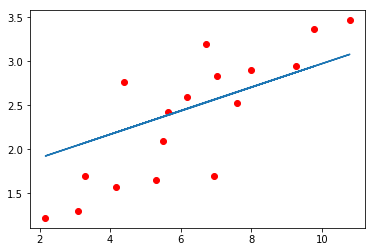

In [10]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred, label='Fitted line')

## scalar

In [11]:
x  = torch.rand(10)
x.size()

torch.Size([10])

## vector

In [12]:
tmp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
tmp.size()

torch.Size([6])

## Matrix

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.data)

boston.feature_names

boston_tensor =  torch.from_numpy(boston.data)
boston_tensor.size()
boston_tensor[:2]
boston_tensor[:10, :5]

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

# 3d-tensor

In [14]:
from PIL import Image
panda = np.array(Image.open('pics_data/panda.jpg'))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()


torch.Size([224, 224, 3])

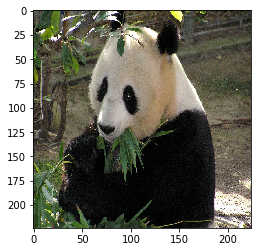

In [15]:
plt.imshow(panda_tensor)

## Slicing Tensor

In [16]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [17]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

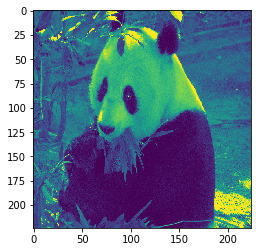

In [18]:
plt.imshow(panda_tensor[:,:,0].numpy())

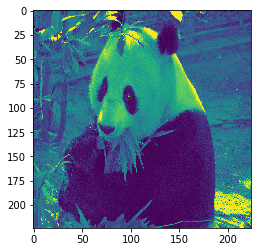

In [19]:
plt.imshow(panda_tensor[:,:,1])

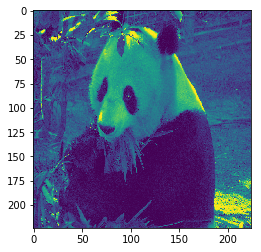

In [20]:
plt.imshow(panda_tensor[:,:,2].numpy())

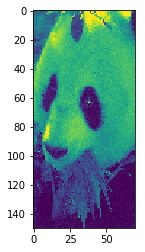

In [21]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy())

## Select specific element of tensor

In [22]:
sales = torch.eye(3,3)
sales[0,1]
print(sales)
sales[1,0]

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


tensor(0.)

## 4DTensor 

In [23]:
from glob import glob
data_path = 'cats_dogs_datas/'
cats = glob(data_path+'*.jpg')

In [24]:
# 获取64张图片
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in cats[:64]])
# reshape的-1的意思是啥？
cat_imgs = cat_imgs.reshape(-1, 224, 224, 3)
# numpy转化为tensor
cat_tensors = torch.from_numpy(cat_imgs)
# 输出大小咯
cat_tensors.size()

torch.Size([64, 224, 224, 3])

## Tensor addition and multiplication

In [25]:
a = torch.rand(2,2)
b = torch.rand(2,2)
# c,d结果相同
c = a + b
d = torch.add(a,b)
print(a, b, c,d)


tensor([[0.3536, 0.2212],
        [0.3262, 0.3267]]) tensor([[0.7702, 0.8662],
        [0.5827, 0.5473]]) tensor([[1.1238, 1.0873],
        [0.9090, 0.8739]]) tensor([[1.1238, 1.0873],
        [0.9090, 0.8739]])


In [26]:
# a.add(5)(a + 5) VS a.add_(5)（后者是改变a的值）
print(a)
print(a + 5)
print(a)
print(a.add(5))
print(a)
print(a.add_(5))
print(a)

tensor([[0.3536, 0.2212],
        [0.3262, 0.3267]])
tensor([[5.3536, 5.2212],
        [5.3262, 5.3267]])
tensor([[0.3536, 0.2212],
        [0.3262, 0.3267]])
tensor([[5.3536, 5.2212],
        [5.3262, 5.3267]])
tensor([[0.3536, 0.2212],
        [0.3262, 0.3267]])
tensor([[5.3536, 5.2212],
        [5.3262, 5.3267]])
tensor([[5.3536, 5.2212],
        [5.3262, 5.3267]])


In [27]:
aa = torch.tensor([1,2,-1,1,0,1]).reshape(3,2)

bb = torch.tensor([3,2,1,4,3,1]).reshape(3,2)
print(aa)
print(bb)


tensor([[ 1,  2],
        [-1,  1],
        [ 0,  1]])
tensor([[3, 2],
        [1, 4],
        [3, 1]])


In [28]:
aa*bb
aa.mul(bb)
# 矩阵的点乘，对应位置元素相乘

tensor([[ 3,  4],
        [-1,  4],
        [ 0,  1]])

In [29]:
aa.mul_(bb)

tensor([[ 3,  4],
        [-1,  4],
        [ 0,  1]])

# On GUP

In [30]:
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
a.matmul(b)

tensor([[2505.7131, 2465.2898, 2498.1201,  ..., 2512.6514, 2456.4404,
         2477.1655],
        [2547.2852, 2500.7056, 2545.5933,  ..., 2549.3586, 2522.0640,
         2539.6814],
        [2492.4988, 2450.1641, 2495.9402,  ..., 2489.0535, 2477.5408,
         2454.0181],
        ...,
        [2532.4087, 2483.6072, 2506.5903,  ..., 2508.6843, 2473.5107,
         2500.4775],
        [2522.3882, 2472.0933, 2514.4558,  ..., 2521.7310, 2474.5879,
         2500.5278],
        [2525.5161, 2477.6819, 2511.4788,  ..., 2515.1123, 2475.5850,
         2484.9587]])

In [31]:
# 未安装Cuda
# a = a.cuda()
# b = b.cuda()
# a.matmul(b)

# Variables

In [32]:

from torch.autograd import Variable

In [33]:
x = Variable(torch.ones(2, 2), requires_grad=True)
y = x.mean()
y.backward()
x.grad
# 所以这个梯度是怎么算的？


tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [34]:
print(x.grad_fn)

None


In [35]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [36]:
y.grad_fn

## create data for our neurral network

In [37]:
X,y = get_data()

# Create learnable parameters

In [38]:
w,b = get_weights()

### Implement Neural Network

In [39]:
simple_network(X)

tensor([ -4.0566,  -5.0280,  -5.9994,  -7.0679,  -7.2622,  -4.8231,  -9.7781,
         -6.6016,  -7.8450,  -3.0561,  -7.3611, -10.6717,  -5.8342,  -8.2044,
         -6.1354,  -9.3286,  -3.8800], grad_fn=<AddBackward0>)

## Implement Neural Network in Pytorch

In [40]:
import torch.nn as nn
f = nn.Linear(17,1)
f

Linear(in_features=17, out_features=1, bias=True)



##  Loading Data
### Defning Dataset

In [41]:
from torch.utils.data import Dataset

In [42]:
# class DogAndCatDataset(Dataset):
#     def __init__(self, ):
#         pass
#     def __len__(self, ):
#         pass
#     def __getitem__(self, ):
#         pass
        
class DogAndCatDataset(Dataset):
    def __init__(self, root_dir, size = (224, 224) ):
        self.files = glob(root_dir+'*.jpg')
        # 修改大小
        
        self.size = size
    def __len__(self, ):
        return len(self.files)
    def __getitem__(self, idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        print(img)
        label = 'cat'
        return img, label
    def length(self):
        return self.__len__()
    def get_item(self, index):
        return self.__getitem__(index)
        

In [43]:

cats_vs_dogs = DogAndCatDataset(root_dir = 'cats_dogs_datas/')

In [44]:
cats_vs_dogs.length()


96

In [47]:
cats_vs_dogs.get_item(3)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  